# Analisis exploratorio de los datos preprocesados

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
df=pd.read_csv('data/processed/data_final_nan.csv')
df.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,52.0,49.71,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NORTE
1,2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,53.0,46.70,715.1,0.0,88.0,NaN,0.002,11.14,1.3,3.0,NORTE
2,2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.0,44.42,714.1,0.0,88.0,NaN,0.002,11.35,1.3,119.0,NORTE
3,2020-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,60.0,46.84,713.8,0.0,88.0,NaN,0.002,11.52,1.3,110.0,NORTE
4,2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,59.0,33.15,713.3,0.0,88.0,NaN,0.002,11.52,NaN,110.0,NORTE


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144498 entries, 0 to 144497
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    144498 non-null  object 
 1   CO      118622 non-null  float64
 2   NO      113641 non-null  float64
 3   NO2     116278 non-null  float64
 4   NOX     118166 non-null  float64
 5   O3      117992 non-null  float64
 6   PM10    137680 non-null  float64
 7   PM2.5   107799 non-null  float64
 8   PRS     130513 non-null  float64
 9   RAINF   133977 non-null  float64
 10  RH      118685 non-null  float64
 11  SO2     115083 non-null  float64
 12  SR      141707 non-null  float64
 13  TOUT    126924 non-null  float64
 14  WSR     133082 non-null  float64
 15  WDR     122274 non-null  float64
 16  Zona    144498 non-null  object 
dtypes: float64(15), object(2)
memory usage: 18.7+ MB


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print("DataFrame con índice de fecha listo.")
print(df.info()) 


DataFrame con índice de fecha listo.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144498 entries, 2020-01-01 00:00:00 to 2025-06-30 23:00:00
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CO      118622 non-null  float64
 1   NO      113641 non-null  float64
 2   NO2     116278 non-null  float64
 3   NOX     118166 non-null  float64
 4   O3      117992 non-null  float64
 5   PM10    137680 non-null  float64
 6   PM2.5   107799 non-null  float64
 7   PRS     130513 non-null  float64
 8   RAINF   133977 non-null  float64
 9   RH      118685 non-null  float64
 10  SO2     115083 non-null  float64
 11  SR      141707 non-null  float64
 12  TOUT    126924 non-null  float64
 13  WSR     133082 non-null  float64
 14  WDR     122274 non-null  float64
 15  Zona    144498 non-null  object 
dtypes: float64(15), object(1)
memory usage: 18.7+ MB
None


In [26]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
stats_summary = df[numeric_cols].describe()


print("\n--- Resumen Estadístico de Variables Numéricas ---")
print(stats_summary.T)


--- Resumen Estadístico de Variables Numéricas ---
          count        mean         std      min     25%      50%      75%  \
CO     118622.0    1.351387    0.884103     0.05    0.67    1.170    1.810   
NO     113641.0    8.955196   16.231528     0.50    2.60    3.600    7.600   
NO2    116278.0   14.686102   12.508786     0.00    6.30   11.100   19.200   
NOX    118166.0   22.960721   24.220810     0.50    9.00   14.900   27.400   
O3     117992.0   28.350108   19.828295     1.00   13.00   24.000   39.000   
PM10   137680.0   54.874273   35.123320     2.00   33.00   47.000   67.000   
PM2.5  107799.0   20.110019   13.825272     0.00   10.15   17.000   26.660   
PRS    130513.0  712.075770    4.612436   669.00  709.20  711.900  714.900   
RAINF  133977.0    0.004391    0.373807     0.00    0.00    0.000    0.000   
RH     118685.0   53.385490   94.661873 -9999.00   38.00   56.000   72.000   
SO2    115083.0    4.031860    2.574129     0.50    2.50    3.400    4.800   
SR     14170

In [27]:
import numpy as np

# Reemplazar valores centinela (-9999) en todo el DataFrame
df.replace(-9999, np.nan, inplace=True)

# Corregir valores físicamente imposibles usando .loc para eficiencia

# RH: Humedad Relativa. Rango físico es [0, 100].
df.loc[df['RH'] > 100, 'RH'] = np.nan
df.loc[df['RH'] < 0, 'RH'] = np.nan

# TOUT: Temperatura. (min -67.49 es imposible).
# Usemos un rango meteorológico razonable para la zona (ej. -10°C a 55°C)
df.loc[df['TOUT'] < -10, 'TOUT'] = np.nan
df.loc[df['TOUT'] > 55, 'TOUT'] = np.nan

# WSR: Velocidad Viento. (max 134.8 es un spike).
# Los rangos del PDF sugieren 0-75 km/h
df.loc[df['WSR'] > 100, 'WSR'] = np.nan
df.loc[df['WSR'] < 0, 'WSR'] = np.nan

# la radiación Solar no puede ser negativa.
df.loc[df['SR'] < 0, 'SR'] = np.nan


In [28]:
# Próximo paso: Verificar la limpieza

# Asumiendo 'numeric_cols' definido en el paso anterior
new_stats_summary = df[numeric_cols].describe()
print(new_stats_summary.T)

          count        mean         std     min     25%      50%      75%  \
CO     118622.0    1.351387    0.884103    0.05    0.67    1.170    1.810   
NO     113641.0    8.955196   16.231528    0.50    2.60    3.600    7.600   
NO2    116278.0   14.686102   12.508786    0.00    6.30   11.100   19.200   
NOX    118166.0   22.960721   24.220810    0.50    9.00   14.900   27.400   
O3     117992.0   28.350108   19.828295    1.00   13.00   24.000   39.000   
PM10   137680.0   54.874273   35.123320    2.00   33.00   47.000   67.000   
PM2.5  107799.0   20.110019   13.825272    0.00   10.15   17.000   26.660   
PRS    130513.0  712.075770    4.612436  669.00  709.20  711.900  714.900   
RAINF  133977.0    0.004391    0.373807    0.00    0.00    0.000    0.000   
RH     118671.0   54.230039   21.113130    0.00   38.00   56.000   72.000   
SO2    115083.0    4.031860    2.574129    0.50    2.50    3.400    4.800   
SR     141688.0    0.138933    0.241656    0.00    0.00    0.002    0.176   

In [29]:
print("Calculo de el recuento de valores NaN por columna")

total_rows = df.shape[0]
nan_counts = df.isnull().sum()

nan_percentages = (nan_counts / total_rows) * 100

nan_summary = pd.DataFrame({
    'Conteo_NaN': nan_counts,
    'Porcentaje_NaN': nan_percentages
})

nan_summary_sorted = nan_summary.sort_values(by='Porcentaje_NaN', ascending=False)

print(f"Total de registros (filas): {total_rows}")
print("\n--- Resumen de Valores Nulos (NaN) por Variable ---")
print(nan_summary_sorted)

Calculo de el recuento de valores NaN por columna
Total de registros (filas): 144498

--- Resumen de Valores Nulos (NaN) por Variable ---
       Conteo_NaN  Porcentaje_NaN
PM2.5       36699       25.397583
NO          30857       21.354621
SO2         29415       20.356683
NO2         28220       19.529682
O3          26506       18.343506
NOX         26332       18.223090
CO          25876       17.907514
RH          25827       17.873604
WDR         22226       15.381528
TOUT        18000       12.456920
PRS         13985        9.678335
WSR         11417        7.901147
RAINF       10521        7.281070
PM10         6818        4.718404
SR           2810        1.944664
Zona            0        0.000000


In [30]:

print("Iniciando imputación NaN por grupo (Zona)...")

df[numeric_cols] = df.groupby('Zona')[numeric_cols].transform(
    lambda x: x.interpolate(method='time')
)

print("Interpolación por grupo completada.")

print("Iniciando relleno secundario (bfill) para NaNs iniciales...")
df[numeric_cols] = df.groupby('Zona')[numeric_cols].transform(
    lambda x: x.bfill()
)

print("Relleno secundario completado.")

print("\n--- Verificación final de NaNs ---")
nan_final_check = df.isnull().sum()
print(nan_final_check)

Iniciando imputación NaN por grupo (Zona)...
Interpolación por grupo completada.
Iniciando relleno secundario (bfill) para NaNs iniciales...
Relleno secundario completado.

--- Verificación final de NaNs ---
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
Zona     0
dtype: int64



--- Generando Box Plots por Zona ---


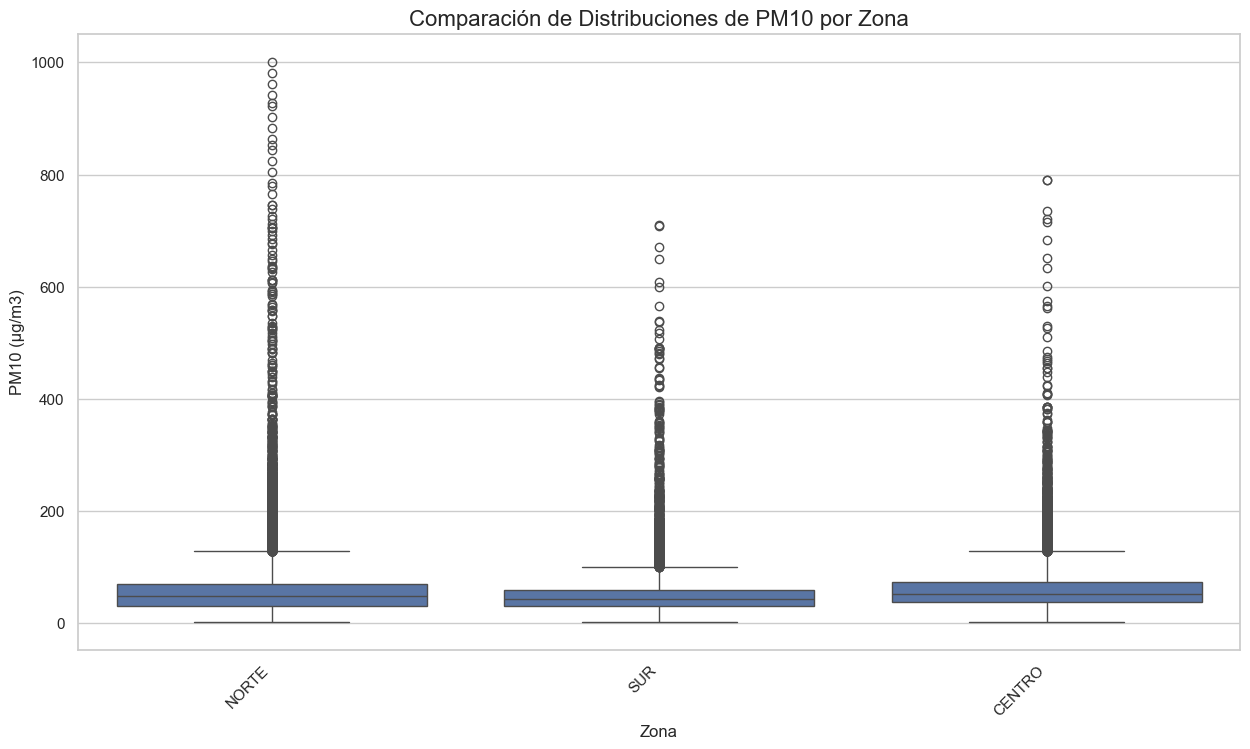

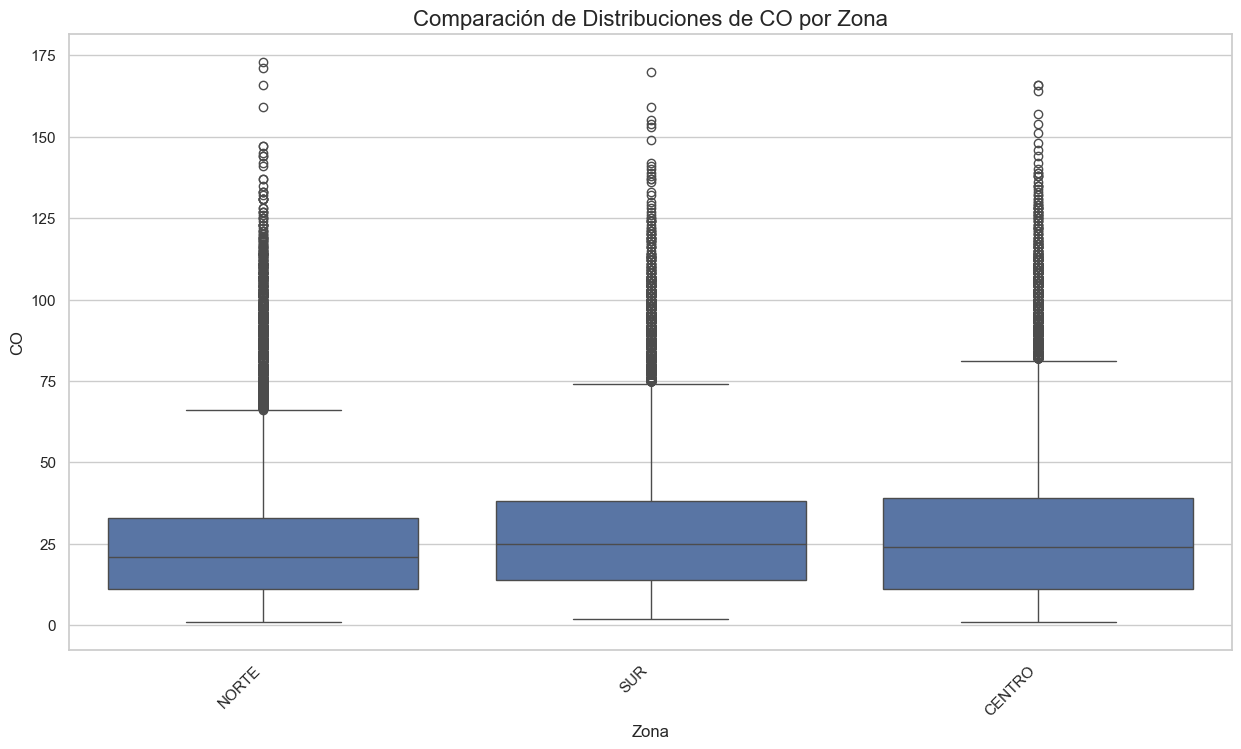

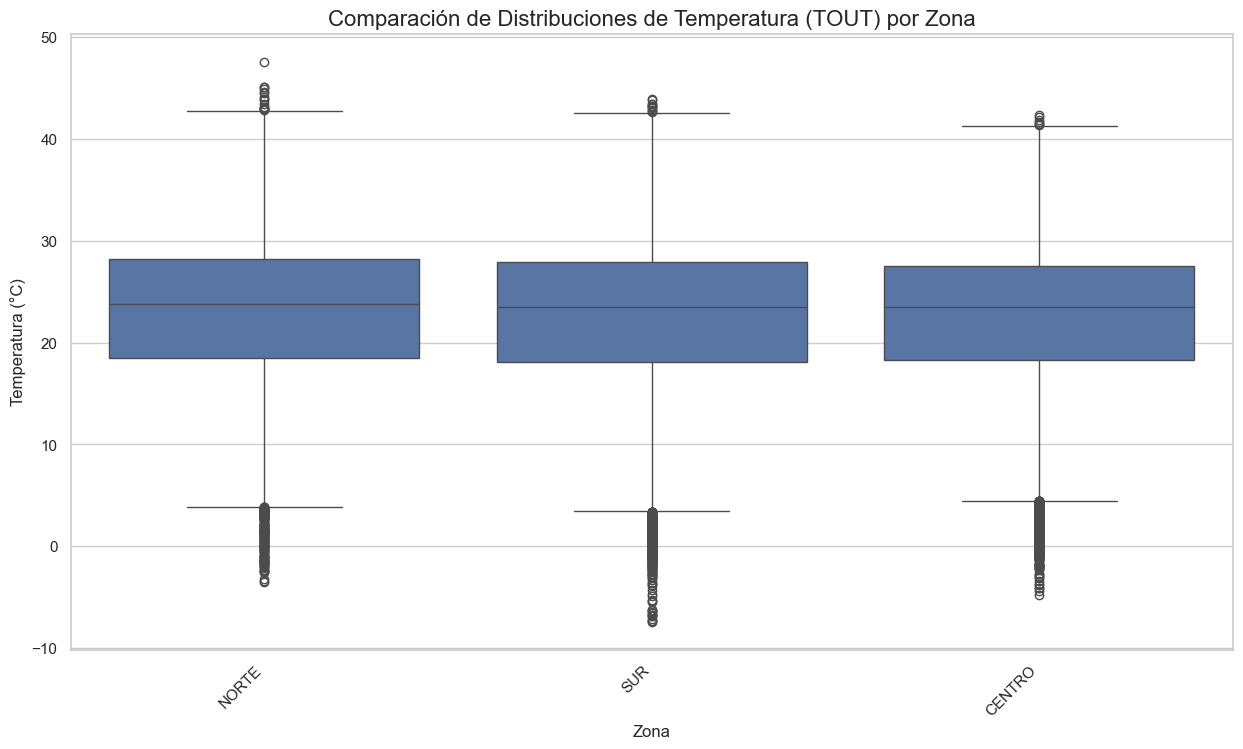

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

print("\n--- Generando Box Plots por Zona ---")

# 1. Box Plot de PM10 por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='PM10', data=df)
plt.title('Comparación de Distribuciones de PM10 por Zona', fontsize=16)
plt.ylabel('PM10 (µg/m3)')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Box Plot de Ozono (O3) por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='O3', data=df)
plt.title('Comparación de Distribuciones de CO por Zona', fontsize=16)
plt.ylabel('CO')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Box Plot de Temperatura (TOUT) por Zona
plt.figure(figsize=(15, 8))
sns.boxplot(x='Zona', y='TOUT', data=df)
plt.title('Comparación de Distribuciones de Temperatura (TOUT) por Zona', fontsize=16)
plt.ylabel('Temperatura (°C)')
plt.xlabel('Zona')
plt.xticks(rotation=45, ha='right')
plt.show()

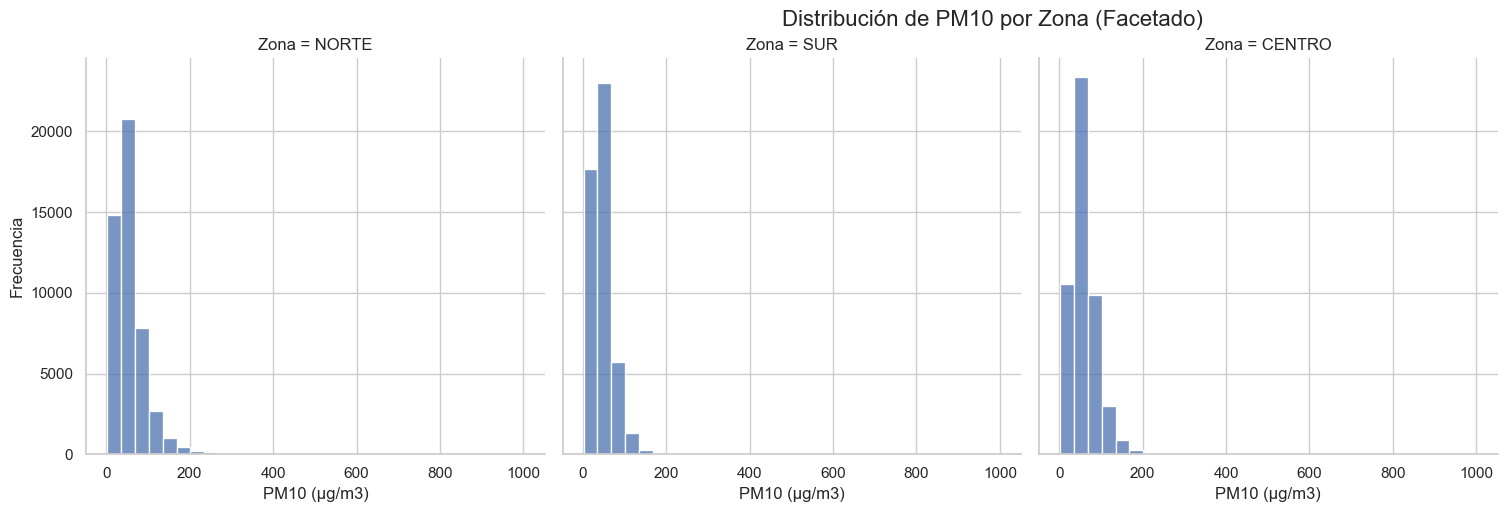

In [32]:
g = sns.displot(df, x='PM10', col='Zona', col_wrap=4, kde=False, bins=30)
g.fig.suptitle('Distribución de PM10 por Zona (Facetado)', y=1.02, fontsize=16)
g.set_axis_labels('PM10 (µg/m3)', 'Frecuencia')
plt.show()

Datos filtrados. 2232 registros encontrados para Mayo 2025.


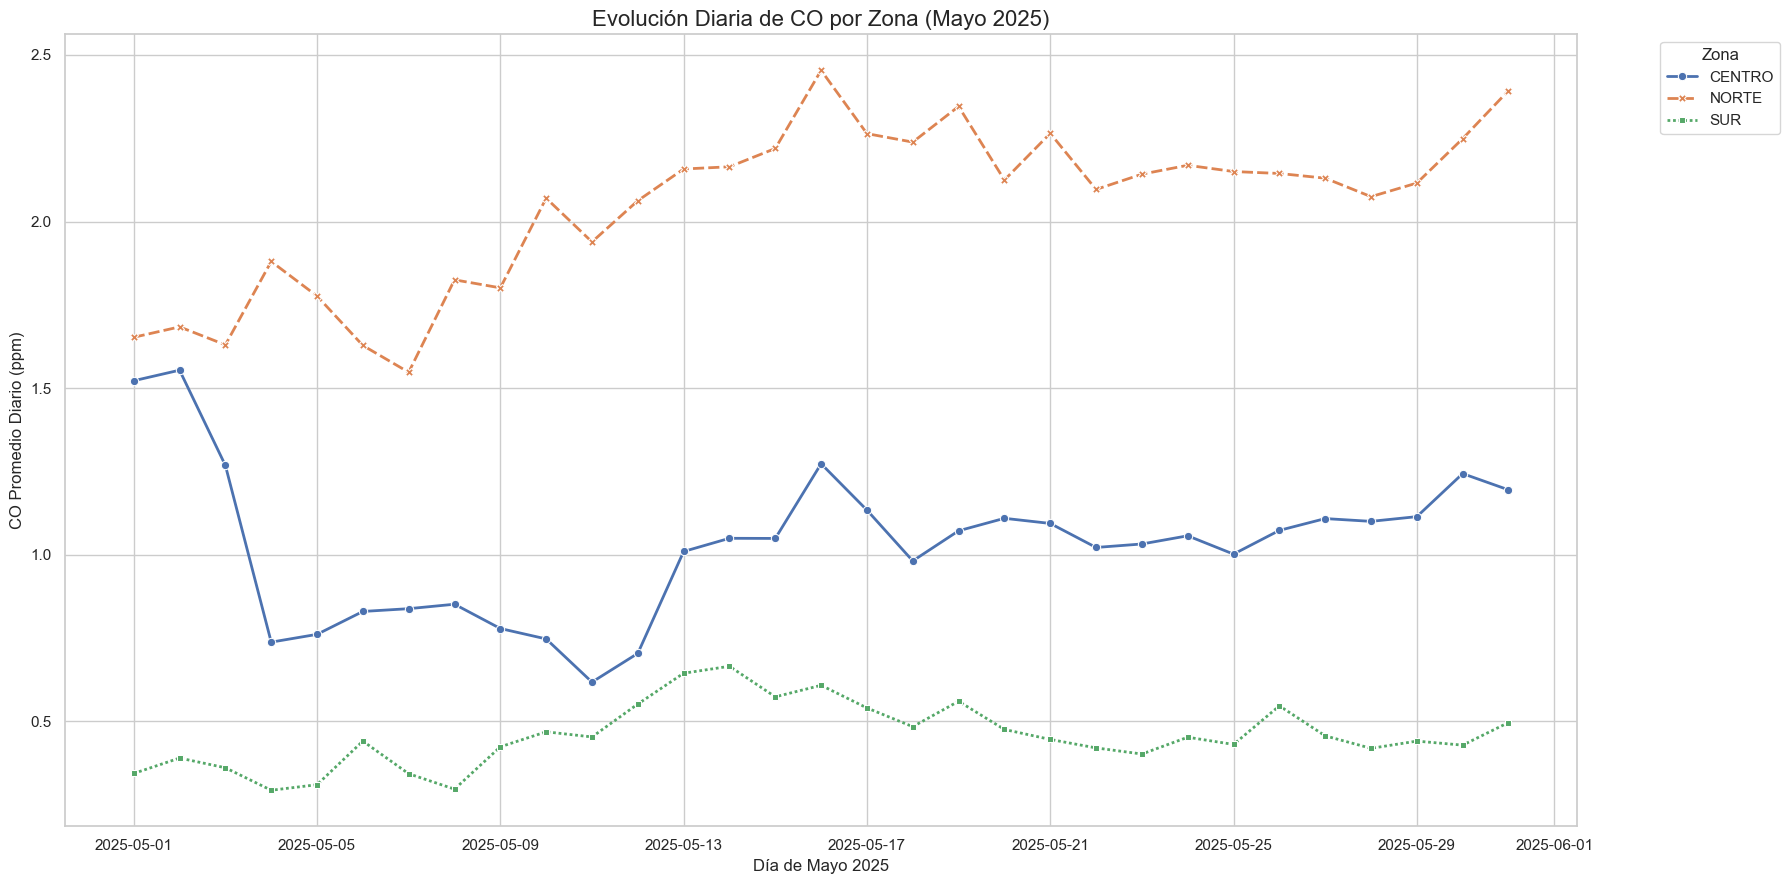

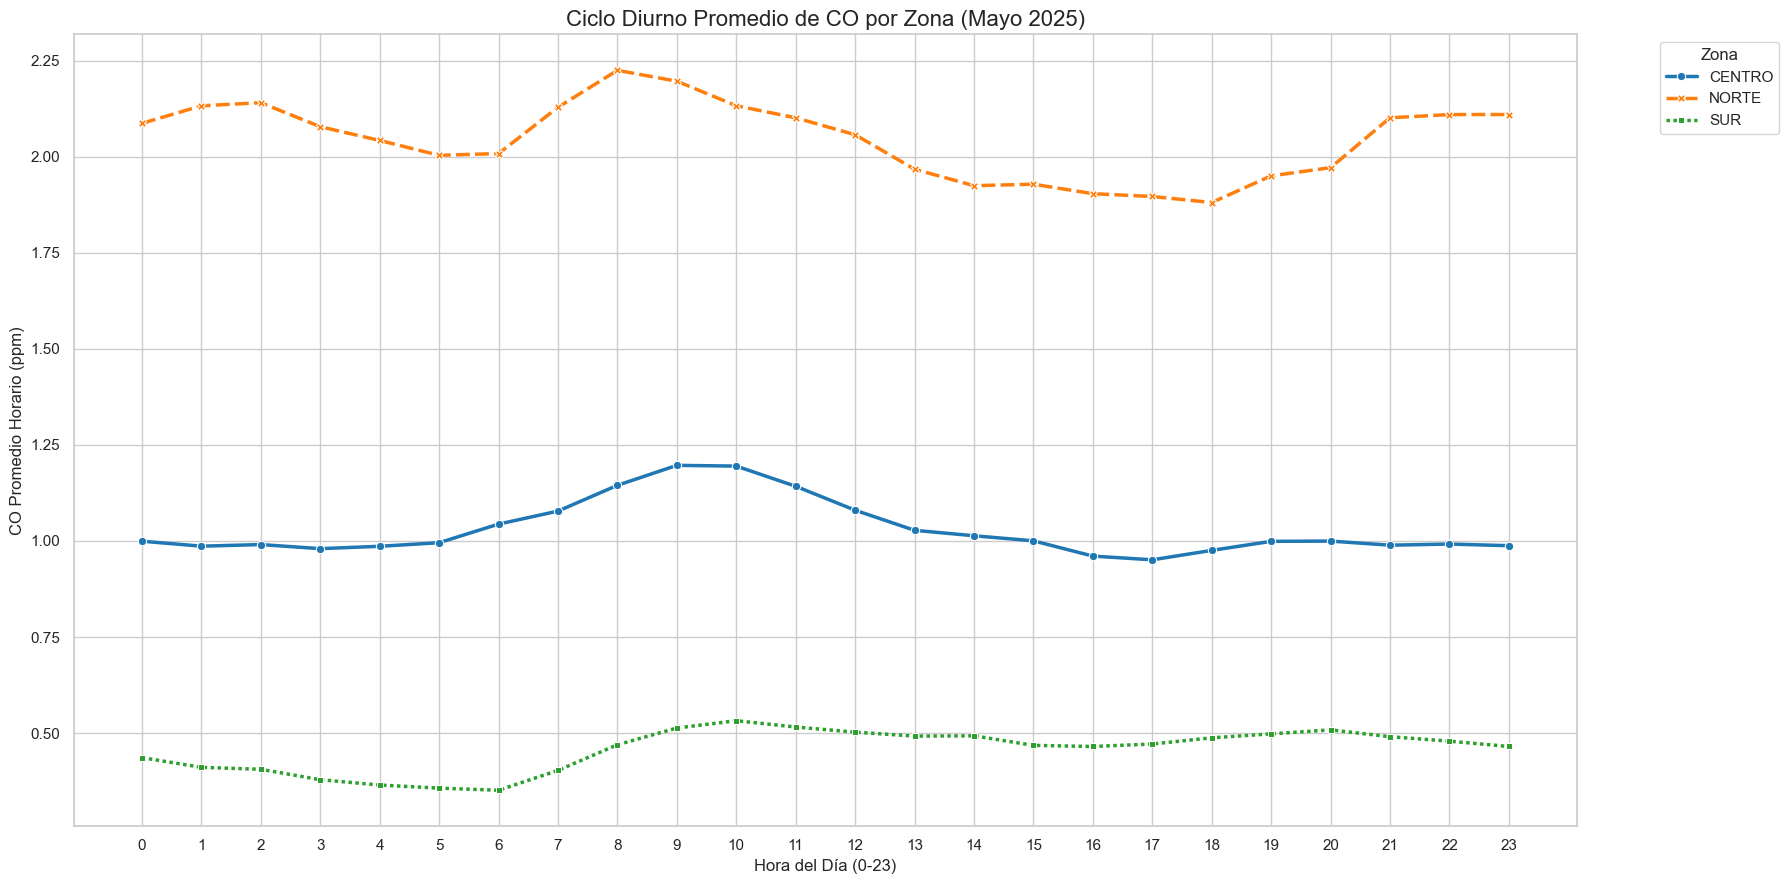

In [33]:
#ordnar df
df.sort_index(inplace=True)

#Filtrar el DataFrame para el rango de fechas (Mayo 2025)
df_mayo_2025 = df.loc['2025-05-01':'2025-05-31'].copy()

if df_mayo_2025.empty:
    print("Advertencia: No se encontraron datos para Mayo de 2025.")
else:
    print(f"Datos filtrados. {df_mayo_2025.shape[0]} registros encontrados para Mayo 2025.")


if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    daily_co = df_mayo_2025.groupby('Zona')['CO'].resample('D').mean().reset_index()

    sns.lineplot(
        data=daily_co, 
        x='date', 
        y='CO', 
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2
    )
    
    plt.title('Evolución Diaria de CO por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Día de Mayo 2025')
    plt.ylabel('CO Promedio Diario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Diario): No hay datos para Mayo de 2025.")

#PATRÓN DE CICLO DIURNO (Promedio Horario)
if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    #columna 'Hora' para agrupar
    df_mayo_2025['Hora'] = df_mayo_2025.index.hour
    
    #Agrupar por Zona y Hora, luego calcular la media de CO
    diurnal_cycle = df_mayo_2025.groupby(['Zona', 'Hora'])['CO'].mean().reset_index()

    sns.lineplot(
        data=diurnal_cycle,
        x='Hora',
        y='CO',
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2.5,
        palette='tab10'
    )
    
    plt.title('Ciclo Diurno Promedio de CO por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Hora del Día (0-23)')
    plt.ylabel('CO Promedio Horario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, 24))
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Ciclo Diurno): No hay datos.")

Calculando la matriz de correlación...
Generando el heatmap...

--- Hallazgos Clave de Correlación ---

Correlaciones más fuertes con O3:
O3      1.000000
TOUT    0.450701
SR      0.427735
WSR     0.409577
SO2     0.158738
Name: O3, dtype: float64

Correlaciones más fuertes con PM2.5:
PM2.5    1.000000
PM10     0.469467
NOX      0.298615
CO       0.283087
NO2      0.259814
Name: PM2.5, dtype: float64

Correlaciones (Negativas) más fuertes con PM2.5 (Dispersión):
PRS     -0.098783
WSR     -0.060336
RAINF   -0.000838
WDR      0.002376
RH       0.016571
Name: PM2.5, dtype: float64


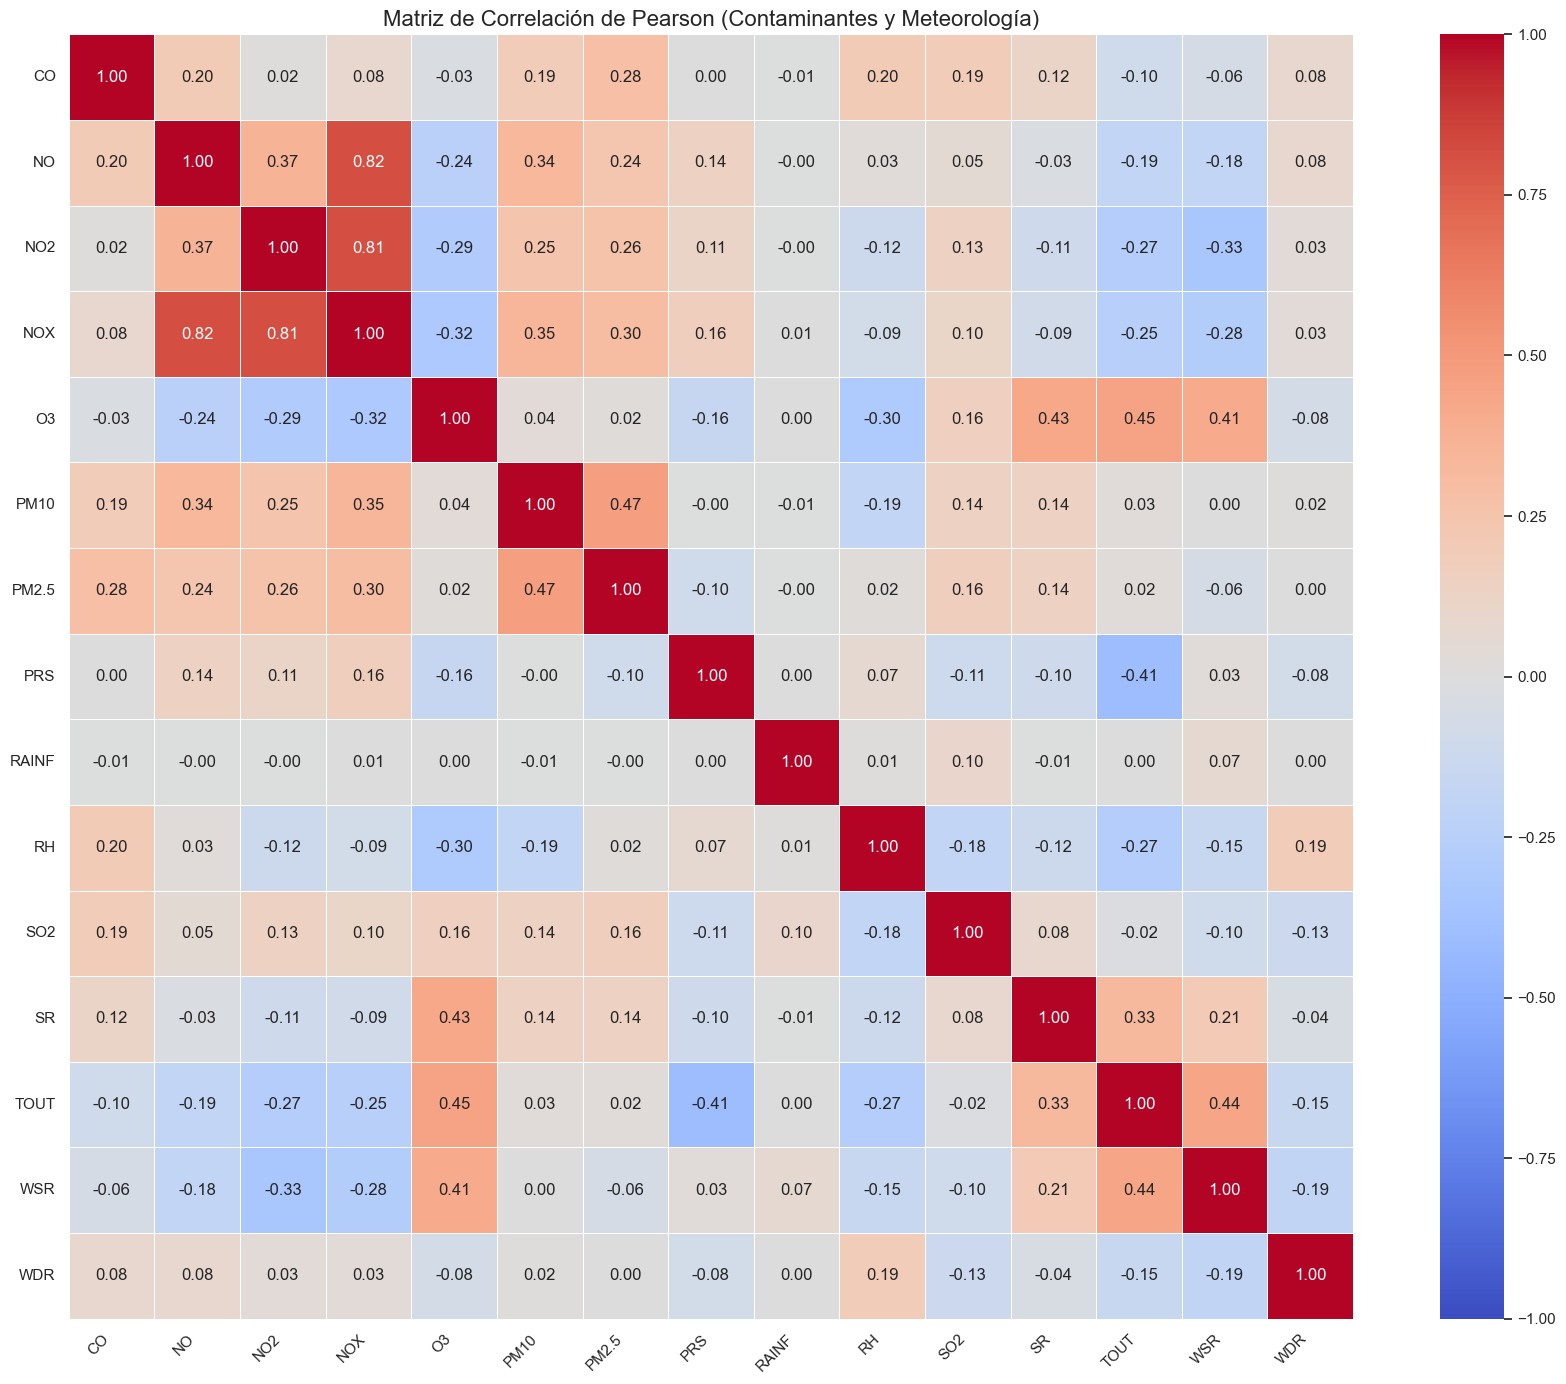

In [34]:
numeric_cols = df.select_dtypes(include=['float64']).columns

print("Calculando la matriz de correlación...")
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Generando el heatmap...")
plt.figure(figsize=(18, 14)) # Tamaño amplio para 15x15 variables

sns.heatmap(
    corr_matrix, 
    annot=True,       # Mostrar los coeficientes
    fmt=".2f",        # Formato de 2 decimales
    cmap='coolwarm',  # Colormap divergente (azul-blanco-rojo)
    vmin=-1,          # Rango mínimo del color
    vmax=1,           # Rango máximo del color
    square=True,      # Forzar celdas cuadradas
    linewidths=.5     # Líneas ligeras entre celdas
)

plt.title('Matriz de Correlación de Pearson (Contaminantes y Meteorología)', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas X para legibilidad
plt.yticks(rotation=0) # Mantener etiquetas Y horizontales
plt.tight_layout() # Ajustar para que no se corten las etiquetas


print("\n--- Hallazgos Clave de Correlación ---")
print("\nCorrelaciones más fuertes con O3:")
print(corr_matrix['O3'].sort_values(ascending=False).head(5))

print("\nCorrelaciones más fuertes con PM2.5:")
print(corr_matrix['PM2.5'].sort_values(ascending=False).head(5))

print("\nCorrelaciones (Negativas) más fuertes con PM2.5 (Dispersión):")
print(corr_matrix['PM2.5'].sort_values(ascending=True).head(5))

In [35]:
output_dir = "data/processed"

print(f"Guardando archivos en {output_dir}...")
df.to_csv(f"{output_dir}/data_final_v1.csv", index=False)

Guardando archivos en data/processed...
